In [144]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [145]:
mapping = {
    'Train Time' : 'train_time',
    'Train Memory Initial' : 'train_mem_init',
    'Train Memory Using' : 'train_mem_use',
    'Train Memory End' : 'train_mem_end',
    'Inference Time' : 'infer_time',
    'Inference Memory Initial' : 'infer_mem_init',
    'Inference Memory Using' : 'infer_mem_use',
    'Inference Memory End' : 'infer_mem_end',
}


In [146]:
def init_df(mapping):
    columns = []
    for ele in mapping:
        columns.append(ele)
    columns.append('F1')
    columns.append('Accuracy')
    columns.append('Precision')
    columns.append('Recall')
    columns.sort()
    df = pd.DataFrame(columns=columns)
    return df
def read_result(path):
    with open(path,'r') as file:
        json_data = json.load(file)
        return json_data
def print_diff(json_data):
    ress = [[]]
    for eval_step in json_data[0]['Evaluate']:
        ress[0].append(eval_step['reference'])
    for step in json_data:
        res = []
        for eval_step in step['Evaluate']:
            res.append(eval_step['predict'])
        ress.append(res)
    for i in range(len(ress[0])):
        same = True
        samsame = True
        row_str = ''
        for j in range(len(ress)):
            if (j != 0 and ress[j][i] != ress[0][i]):
                same = False
            row_str += ress[j][i] + ' '
        for j in range(1,len(ress)-1):
            if (ress[j][i] != ress[j+1][i]):
                samsame = False

        if (samsame != True):
            row_str += 'DIFFDIFF'
        elif (same != True):
            row_str += 'DIFF'
        print(row_str)
def process_result(json_data,df,mapping):        
    for step in json_data:
        evaluates = step['Evaluate']
        row_data = {
            "infer_time": 0,
            "infer_mem_init": 0,
            "infer_mem_use": 0,
            "infer_mem_end": 0
        }
        prediction = []
        reference = []
        for eval_step in evaluates:
            for ele in row_data:
                row_data[ele] += eval_step[ele]
            prediction.append(eval_step['predict'])
            reference.append(eval_step['reference'])
        f1_result = f1_score(y_true=reference,y_pred=prediction,average='weighted')
        accuracy_result = accuracy_score(y_true=reference,y_pred=prediction)
        precision_result = precision_score(y_true=reference,y_pred=prediction,average='weighted')
        new_row = {
            'F1' : f1_result,
            'Accuracy' : accuracy_result,
            'Precision' : precision_result,
            'Recall' : recall_score(y_true=reference,y_pred=prediction,average='weighted')
        }
        for ele in row_data:
            for inner_ele in mapping:
                if ele == mapping[inner_ele]:
                    new_row[inner_ele] = row_data[ele]/len(evaluates)
        for col_name in mapping:
            if (mapping[col_name] in step['Train']):
                new_row[col_name] = step['Train'][mapping[col_name]]
            elif (mapping[col_name] in step['Evaluate']):
                new_row[col_name] = step['Evaluate'][mapping[col_name]]
        df.loc[len(df)] = new_row

In [147]:
def full_flow(path,print_d : bool = False):
    result_df = init_df(mapping)
    json_dat = read_result(path)
    if (print_d):
        print_diff(json_dat)
    process_result(json_dat,result_df,mapping)
    return result_df

In [148]:
df_selector = full_flow("w_final_res\\399884_0,2_1e_4_1k.json")
df_selector.index += 1
df_default = full_flow("w_final_res\\399884_d_1e_4_1k.json")
df_default.index += 1
df_single = full_flow("w_final_res\\399884_s_1e_4_1k0.json")
df_default.loc[0] = df_single.loc[0]
df_selector.loc[0] = df_single.loc[0]
df_default = df_default.sort_index()
df_selector = df_selector.sort_index()

In [149]:
df_selector.head(20)

,Accuracy,F1,Inference Memory End,Inference Memory Initial,Inference Memory Using,Inference Time,Precision,Recall,Train Memory End,Train Memory Initial,Train Memory Using,Train Time
0,0.49,0.478232,2178.988745,1988.600303,190.388442,0.185323,0.508307,0.49,NaN,NaN,NaN,NaN
1,0.48,0.468681,2246.902563,2056.572266,190.330298,1.940438,0.510646,0.48,7939.550293,2048.447266,5891.103027,97.492328
2,0.49,0.478232,2276.785376,2086.455078,190.330298,1.948335,0.508307,0.49,8540.492676,2086.455078,6454.037598,99.966499
3,0.49,0.479377,2299.636938,2109.306641,190.330298,0.791986,0.521239,0.49,7155.062012,2109.306641,5045.755371,157.265124
4,0.49,0.478232,2327.761938,2137.431641,190.330298,0.804482,0.508307,0.49,9712.255371,2137.431641,7574.823730,175.511709
5,0.49,0.478232,2338.298462,2147.978516,190.319946,0.811789,0.508307,0.49,8837.288574,2147.978516,6689.310059,154.370115
6,0.49,0.477500,2343.582251,2153.251953,190.330298,0.806599,0.507546,0.49,7199.007324,2153.251953,5045.755371,152.824126
7,0.49,0.477104,2362.918188,2172.587891,190.330298,2.065004,0.498621,0.49,10326.165527,2172.587891,8153.577637,200.452801
8,0.50,0.483553,2371.696899,2181.376953,190.319946,1.466328,0.498507,0.50,8966.546387,2181.376953,6785.169434,205.806979
9,0.51,0.495656,2389.285376,2198.955078,190.330298,0.846482,0.509752,0.51,9777.262695,2198.955078,7578.307617,245.389955


In [150]:
df_default.head(20)

,Accuracy,F1,Inference Memory End,Inference Memory Initial,Inference Memory Using,Inference Time,Precision,Recall,Train Memory End,Train Memory Initial,Train Memory Using,Train Time
0,0.49,0.478232,2178.988745,1988.600303,190.388442,0.185323,0.508307,0.49,NaN,NaN,NaN,NaN
1,0.49,0.478045,2255.712212,2065.361328,190.350884,1.849598,0.508255,0.49,7948.565918,2049.102539,5899.463379,108.966015
2,0.48,0.467412,2269.785063,2079.423828,190.361235,2.530789,0.497585,0.48,8533.312988,2079.423828,6453.889160,117.885185
3,0.49,0.478232,2280.321587,2089.970703,190.350884,0.754207,0.508307,0.49,7751.549316,2089.970703,5661.578613,138.429057
4,0.49,0.478232,2285.604282,2095.244141,190.360142,0.758206,0.508307,0.49,10355.350586,2095.244141,8260.106445,137.269025
5,0.49,0.478232,2285.610415,2095.244141,190.366274,2.491196,0.508307,0.49,6977.133301,2095.244141,4881.889160,123.964360
6,0.49,0.478232,2285.605376,2095.244141,190.361235,0.753601,0.508307,0.49,10490.040527,2095.244141,8394.796387,114.962999
7,0.49,0.477500,2285.605376,2095.244141,190.361235,0.755367,0.507546,0.49,10250.364746,2095.244141,8155.120605,119.535048
8,0.49,0.477500,2285.605376,2095.244141,190.361235,2.158333,0.507546,0.49,8507.119629,2095.244141,6411.875488,117.905169
9,0.48,0.468967,2285.605376,2095.244141,190.361235,0.762436,0.500235,0.48,9672.949707,2095.244141,7577.705566,127.422890


In [151]:
df_single.head(20)

,Accuracy,F1,Inference Memory End,Inference Memory Initial,Inference Memory Using,Inference Time,Precision,Recall,Train Memory End,Train Memory Initial,Train Memory Using,Train Time
0,0.49,0.478232,2178.988745,1988.600303,190.388442,0.185323,0.508307,0.49,NaN,NaN,NaN,NaN
1,0.48,0.467412,2187.141362,1996.806641,190.334722,0.177031,0.497585,0.48,5401.240723,1988.681641,3412.559082,9.779819
2,0.49,0.479190,2187.129565,1996.806641,190.322925,0.175975,0.521188,0.49,3891.689941,1996.806641,1894.883301,3.413517
3,0.49,0.479752,2187.128979,1996.806641,190.322339,0.174491,0.521846,0.49,5139.996582,1996.806641,3143.189941,7.146743
4,0.49,0.479190,2187.141362,1996.806641,190.334722,0.174512,0.521188,0.49,7542.410645,1996.806641,5545.604004,12.576977
5,0.49,0.478045,2187.118003,1996.806641,190.311362,0.608770,0.508255,0.49,4707.148926,1996.806641,2710.342285,6.483850
6,0.51,0.499126,2187.141362,1996.806641,190.334722,0.173905,0.540282,0.51,2918.841309,1996.806641,922.034668,2.516476
7,0.52,0.506315,2187.118003,1996.806641,190.311362,0.177231,0.534766,0.52,3944.866699,1996.806641,1948.060059,3.841635
8,0.52,0.507666,2187.118003,1996.806641,190.311362,0.177522,0.537717,0.52,7475.226074,1996.806641,5478.419434,12.831098
9,0.52,0.507112,2187.118003,1996.806641,190.311362,0.175447,0.528377,0.52,3590.980957,1996.806641,1594.174316,2.921136


In [152]:
def trip_plot(column_name,y_axis_name : str = 'Point'):
    line1 = df_single[column_name]
    line2 = df_default[column_name]
    line3 = df_selector[column_name]
    plt.figure(figsize=(10,6))
    # def moving_average(series,window_size):
    #     return series.rolling(window=window_size,min_periods=1).mean()
    plt.plot(line1,label='Single',color='blue')
    plt.plot(line2,label='Default',color='green')
    plt.plot(line3,label='Auto',color='orange')
    plt.title('F1 Score')
    plt.xlabel('Step')
    plt.ylabel(y_axis_name)
    plt.xticks(range(0,11))
    plt.xlim((0,10))
    plt.legend()
    plt.show()
def get_average(column_name):
    result = {
        'Single' : df_single[column_name][1:11].mean(),
        'Default' : df_default[column_name][1:11].mean(),
        'Auto' : df_selector[column_name][1:11].mean()
    }
    return result

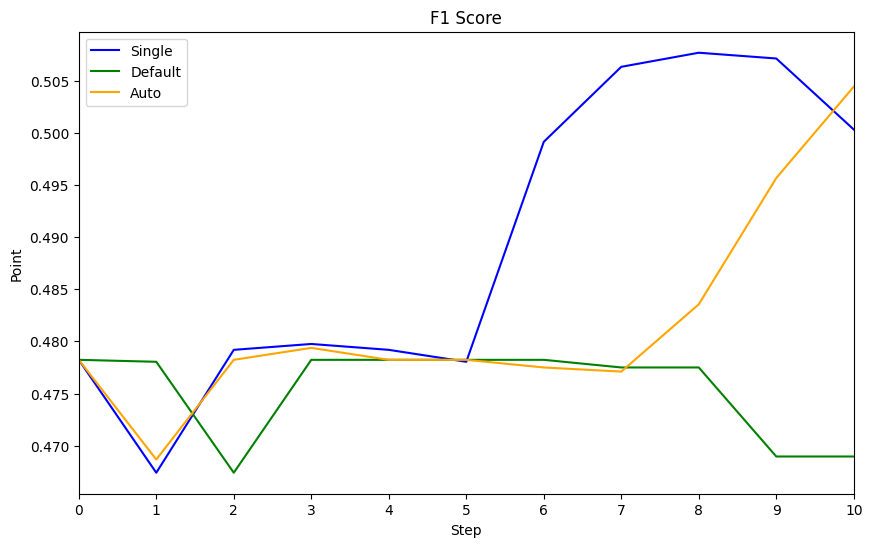

In [153]:
trip_plot('F1','Point')

In [154]:
print(get_average('Inference Memory Initial'))

{'Single': 1996.806640625, 'Default': 2090.146484375, 'Auto': 2144.990234375}


In [ ]:
df_test = full_flow('result.json')

In [ ]:
df_test.head(20)